In [2]:
from typing import Tuple
import math

def normal_approximation_bo_binomial(n: int, p: float) -> Tuple[float, float]:
    """Returns mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

P(both | older): 0.5007089325501317
P(both | either):  1.0


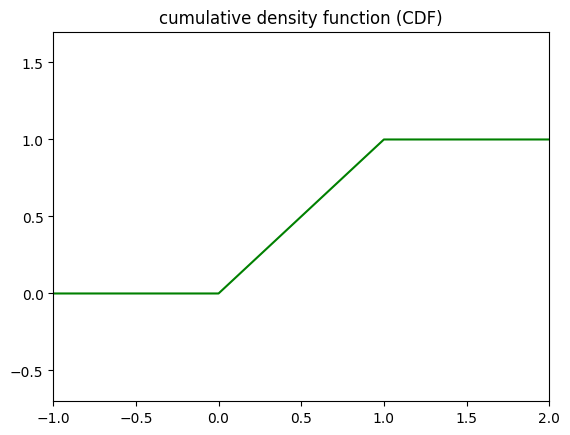

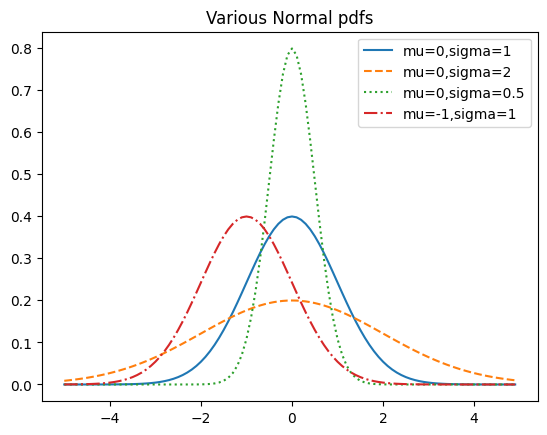

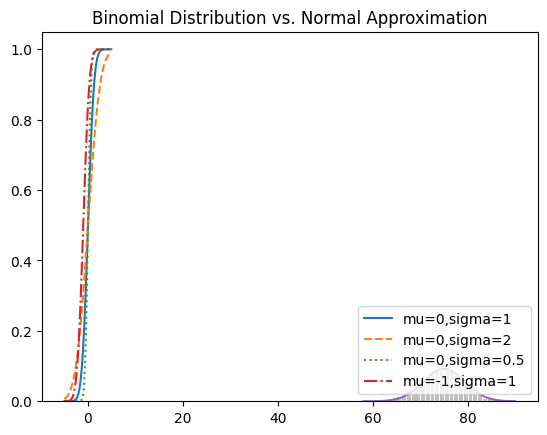

In [3]:
# import sys
# adding folder2_subfolder to the system path
# sys.path.insert(0, 'D:/Code belajar/Data Science from Scratch')

# from scratch.probability import normal_cdf

from ipynb.fs.full.Chapter_6 import normal_cdf

# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float, mu: float = 0, sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is greater than lo"""
    return 1 - normal_cdf(lo, mu, sigma)

# It's between if it's less than hi, but not less than lo
def normal_probability_between(lo: float, hi: float, mu: float, sigma: float = 1) -> float:
    """The probability than an N(mu, sigma) is between lo and hi"""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# It's outside if it's not between
def normal_probability_outside(lo: float, hi: float, mu: float, sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is not between lo and hi"""
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [4]:
# from scratch.probability import inverse_normal_cdf

from ipynb.fs.full.Chapter_6 import inverse_normal_cdf

def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float, mu: float, sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float, mu: float, sigma: float = 1) -> Tuple[float, float]:
    """Returns the symetric (about the mean) bounds that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # Upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

In [5]:
mu_0, sigma_0 = normal_approximation_bo_binomial(1000, 0.5)
print(mu_0)
print(sigma_0)

500.0
15.811388300841896


In [6]:
# 95% bounds based an assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# Actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_bo_binomial(1000, 0.55)

# a type 2 errror means we fail to reject the null hypothesis, which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability

In [7]:
print(power)

0.8865480012953671


In [8]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability
print(power)

0.9363794803307173


In [9]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    How likely are we to see a value at least as extreme as x (in either direction)
    if out values are from an N(mu, sigma)?
    """
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)

two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [10]:
import random

extreme_value_count = 0
for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1

extreme_value_count
# p-value was 0.062 => ~62 extreme values out of 1000
# assert 59 < extreme_value_count < 65, f"{extreme_value_count}"

67

In [11]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [12]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

print(upper_p_value(524.5, mu_0, sigma_0))
print(upper_p_value(526.5, mu_0, sigma_0))

0.06062885772582072
0.04686839508859242


In [13]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
print(sigma)

0.015791611697353755


In [14]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

In [15]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
print(sigma)
print(normal_two_sided_bounds(0.95, mu, sigma))

0.015760710643876435
(0.5091095927295919, 0.5708904072704082)


In [16]:
from typing import List

def run_experient() -> List[bool]:
    """Flips a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairless(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiment = [run_experient() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiment if reject_fairless(experiment)])

assert num_rejections == 46

In [17]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

z = a_b_test_statistic(1000, 200, 1000, 180)
print(z)
print(two_sided_p_value(z))

-1.1403464899034472
0.254141976542236


In [18]:
z = a_b_test_statistic(1000, 200, 1000, 150)    # -2.94
two_sided_p_value(z)                            # 0.003

def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)


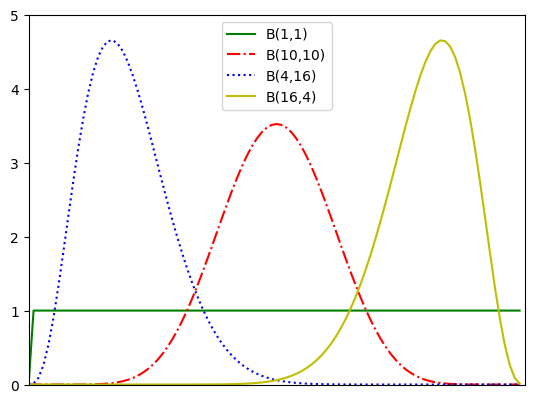

In [19]:
import matplotlib.pyplot as plt

xs = [ num/100 for num in range(100)]

ys_1 = [beta_pdf(num,1,1) for num in xs]
ys_2 = [beta_pdf(num,10,10) for num in xs]
ys_3 = [beta_pdf(num,4,16) for num in xs]
ys_4 = [beta_pdf(num,16,4) for num in xs]


plt.plot(xs,ys_1,'g-', label="B(1,1)")
plt.plot(xs,ys_2,'r-.', label="B(10,10)")
plt.plot(xs,ys_3,'b:', label="B(4,16)")
plt.plot(xs,ys_4,'y-', label="B(16,4)")
plt.axis([0,1,0,5])

plt.legend(loc=9)
plt.xticks([])

plt.show()

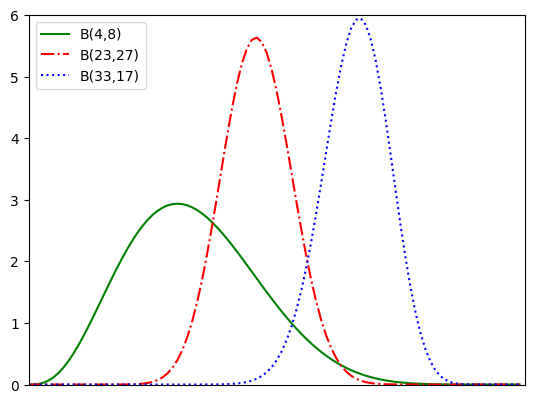

In [20]:
import matplotlib.pyplot as plt

xs = [ num/100 for num in range(100)]
ys_1 = [beta_pdf(num,4,8) for num in xs]
ys_2 = [beta_pdf(num,23,27) for num in xs]
ys_3 = [beta_pdf(num,33,17) for num in xs]

plt.plot(xs,ys_1,'g-', label="B(4,8)")
plt.plot(xs,ys_2,'r-.', label="B(23,27)")
plt.plot(xs,ys_3,'b:', label="B(33,17)")
plt.axis([0,1,0,6])

plt.legend(loc=2)
plt.xticks([])

plt.show()